<a href="https://colab.research.google.com/github/linhoangce/pytorch_crash_course/blob/main/classification_in_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Make classification data and get it ready

In [6]:
import sklearn

In [7]:
from sklearn.datasets import make_circles

In [8]:

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [9]:
len(X), len(y)

(1000, 1000)

In [10]:
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [11]:
y[:5]

array([1, 1, 1, 1, 0])

In [12]:
# Make DataFrame of circle data
import pandas as pd


In [13]:
circles = pd.DataFrame({'X1': X[:, 0],
                        'X2': X[:, 1],
                        'label': y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [14]:
import matplotlib.pyplot as plt

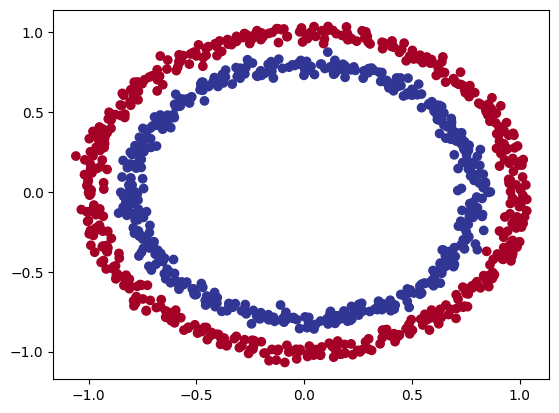

In [15]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

### 1.1 Check input and output shapes

In [16]:
X.shape, y.shape

((1000, 2), (1000,))

In [17]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [18]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shapes of one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}')

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes of one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensor and create train and test splits

In [19]:
import torch

torch.__version__

'2.6.0+cu124'

In [20]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [21]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [22]:
X.dtype, y.dtype

(torch.float32, torch.float32)

In [23]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [24]:
type(X)

torch.Tensor

In [25]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test data
                                                    random_state=42)

In [27]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Building a model

Build a model to classify blue and red dots.

Steps:

1. Set up device agnostic code to run computation on an accelerator (GPR) if available
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a training and test loop

In [28]:
import torch
from torch import nn

In [29]:
# Make a device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [30]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

After setting up a device agnostic code, we create a model that:

1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear` layers that are capable of handling the shape of our data
3. Defines a `forward()` method that outlines the forward pass
4. Instantiate an instance of our model class and send it to the target `device`

In [31]:
# 1. construct a model
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create 2 nn.Linear layers capable of handling the shapes of our data
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=5)
    self.layer_2 = nn.Linear(in_features=5,
                             out_features=1)

  # 3. define a forward method
  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

# 4 instantiate a model instance and use target device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [32]:
device

'cuda'

In [33]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [34]:
# Replicate the model above using nn.Sequential
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [35]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0245, -0.1480],
                      [-0.0605, -0.3851],
                      [-0.4403,  0.2365],
                      [ 0.5806,  0.1685],
                      [-0.3731, -0.6685]], device='cuda:0')),
             ('0.bias',
              tensor([-0.2857,  0.5687,  0.5979, -0.2089, -0.6917], device='cuda:0')),
             ('1.weight',
              tensor([[-0.1319,  0.0762, -0.1083,  0.0527,  0.2955]], device='cuda:0')),
             ('1.bias', tensor([0.4169], device='cuda:0'))])

In [36]:
# Inference
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'length of predictions: {len(untrained_preds)}')
print(f'shape: {untrained_preds.shape}')
print(f'length of test samples: {len(X_test)}')
print(f'shape: {X_test.shape}')
print(f'First 10 preds: \n {untrained_preds[:10]}')
print(f'First 10 labels: \n {y_test[:10]}')

length of predictions: 200
shape: torch.Size([200, 1])
length of test samples: 200
shape: torch.Size([200, 2])
First 10 preds: 
 tensor([[ 0.0773],
        [ 0.0021],
        [ 0.3118],
        [ 0.0107],
        [ 0.3711],
        [ 0.3247],
        [ 0.0660],
        [ 0.1417],
        [ 0.3089],
        [-0.0023]], device='cuda:0')
First 10 labels: 
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [37]:
X_test[:10], y[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

### 2.1 Loss function and optimizer

For loss functions:

* Regression: Mean squared error (MSE) or Mean absolute error (MAE)

* Classification: Binary cross entropy or Categorical cross entropy

For optimizers, two most common: stochastic gradient descent (SGD) or Adam (Adaptive moment estimation)

In [38]:
loss_fn = nn.BCEWithLogitsLoss() # sigmoid activation

optimizer = torch.optim.SGD(params=model_0.parameters(),
                   lr=0.001)

In [39]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc

## 3. Train model

1. Forward pass
2. Calculate loss
3. Zero Grad
4. Backward pass
5. Optimizer step (gradient descent)

### 3.1 Raw logits -> prediction prababilties -> prediction labels

Our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction  probabilities* by passing them to some kind of activation function (e.g sigmoid for binary classification and softmax for multiclass classfication).

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.


In [40]:
# view the first 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[0.0773],
        [0.0021],
        [0.3118],
        [0.0107],
        [0.3711]], device='cuda:0', grad_fn=<SliceBackward0>)

In [41]:
# Pass the model linear layer's outputs to sigmoid activation
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.5193],
        [0.5005],
        [0.5773],
        [0.5027],
        [0.5917]], device='cuda:0', grad_fn=<SigmoidBackward0>)

In [42]:
# predicted labels
y_preds = torch.round(y_pred_probs)

In [43]:
# in full
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# check for equality
print(torch.eq(y_pred_labels.squeeze(), y_preds.squeeze()))

# get rid of extra dimension
y_preds.squeeze(), y_pred_labels.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


(tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>),
 tensor([1., 1., 1., 1., 1.], device='cuda:0', grad_fn=<SqueezeBackward0>))

### 3.2 Build a training and eval loop

In [44]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

# move data to target data
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_0.train()

  # forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> pred labels

  # calculate loss/accuracy
  loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # backward pass
  loss.backward()

  # optimizer step (gradient descent)
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # print the metrics
  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.3f}')


Epoch: 0 | Loss: 0.70313, Acc: 53.87 | Test loss: 0.69588, Test acc: 54.500
Epoch: 10 | Loss: 0.70306, Acc: 54.37 | Test loss: 0.69582, Test acc: 55.000
Epoch: 20 | Loss: 0.70299, Acc: 54.50 | Test loss: 0.69576, Test acc: 55.500
Epoch: 30 | Loss: 0.70292, Acc: 55.00 | Test loss: 0.69571, Test acc: 55.500
Epoch: 40 | Loss: 0.70286, Acc: 55.12 | Test loss: 0.69565, Test acc: 55.500
Epoch: 50 | Loss: 0.70279, Acc: 55.25 | Test loss: 0.69559, Test acc: 55.500
Epoch: 60 | Loss: 0.70273, Acc: 55.62 | Test loss: 0.69554, Test acc: 55.500
Epoch: 70 | Loss: 0.70266, Acc: 56.12 | Test loss: 0.69548, Test acc: 55.500
Epoch: 80 | Loss: 0.70260, Acc: 56.25 | Test loss: 0.69542, Test acc: 55.500
Epoch: 90 | Loss: 0.70254, Acc: 56.38 | Test loss: 0.69537, Test acc: 56.000


## 4. Make predictions and evaluate the model

The metrics indicate the model is not learning anything.

Plot:


In [45]:
import requests
from pathlib import Path

In [46]:
# Download helper functions from Learn PyTorch repo (if it's not downloaded)
if Path("helper_functions.py").is_file():
  print({'file exists!'})
else:
  print('Downloading helper_functions.py...')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


In [47]:
from helper_functions import plot_predictions, plot_decision_boundary

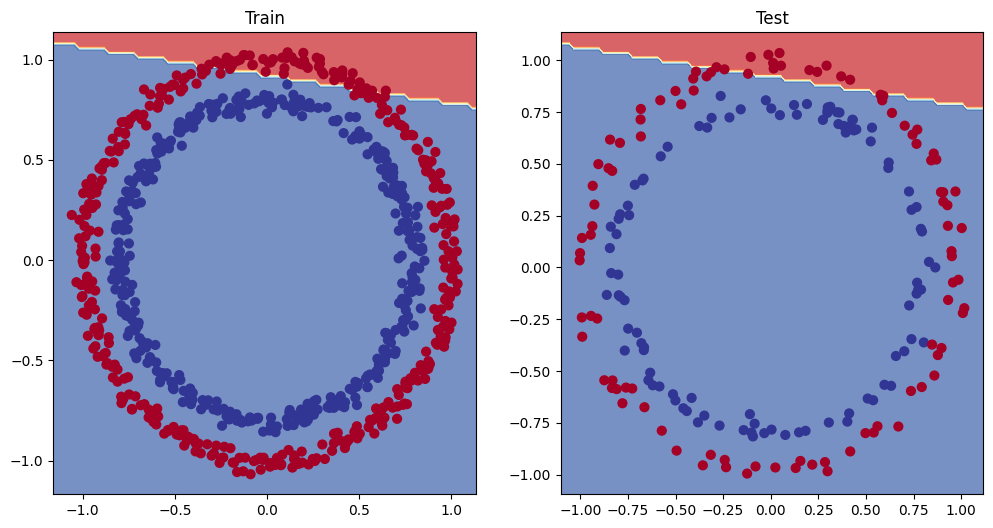

In [48]:
# plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improve a model (from a model perspective)

* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fir for longer
* Change the activation functions
* Change the learning rate



In [49]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=10)
    self.layer_2 = nn.Linear(in_features=10,
                             out_features=10)
    self.layer_3 = nn.Linear(in_features=10,
                             out_features=1)

  def forward(self, x):
    # z = self.layer_1(x)
    # z = self.layer_2(z)
    # z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x))) # this combined code speeds up computation


In [50]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [51]:
next(model_1.parameters()).device

device(type='cuda', index=0)

In [52]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [53]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

In [54]:
epochs = 1000

# move data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):

  model_1.train()

  # forward pass
  z = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(z))

  # loss calculation
  loss = loss_fn(z, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # optimizer zero grad
  optimizer.zero_grad()

  # backward pass
  loss.backward()

  # Optimizer step
  optimizer.step()

  ### Testing
  model_1.eval()

  with torch.inference_mode():
    test_z = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_z))

    # calculate loss
    test_loss = loss_fn(test_z, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)


  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.3f}')

Epoch: 0 | Loss: 0.69396, Acc: 50.88 | Test loss: 0.69261, Test acc: 51.000
Epoch: 100 | Loss: 0.69305, Acc: 50.38 | Test loss: 0.69379, Test acc: 48.000
Epoch: 200 | Loss: 0.69299, Acc: 51.12 | Test loss: 0.69437, Test acc: 46.000
Epoch: 300 | Loss: 0.69298, Acc: 51.62 | Test loss: 0.69458, Test acc: 45.000
Epoch: 400 | Loss: 0.69298, Acc: 51.12 | Test loss: 0.69465, Test acc: 46.000
Epoch: 500 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69467, Test acc: 46.000
Epoch: 600 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, Test acc: 46.000
Epoch: 700 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, Test acc: 46.000
Epoch: 800 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, Test acc: 46.000
Epoch: 900 | Loss: 0.69298, Acc: 51.00 | Test loss: 0.69468, Test acc: 46.000


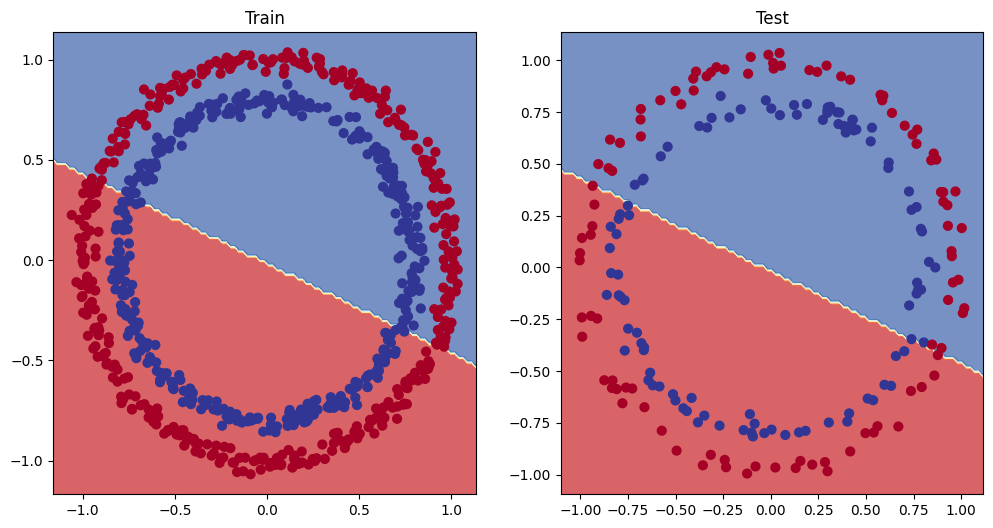

In [55]:
# plot decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)


### 5.1 Testing model on linear data

In [56]:
# Create some small data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check data
len(X_regression), X_regression[:5], y_regression[:5]

(100,
 tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [57]:
# Create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

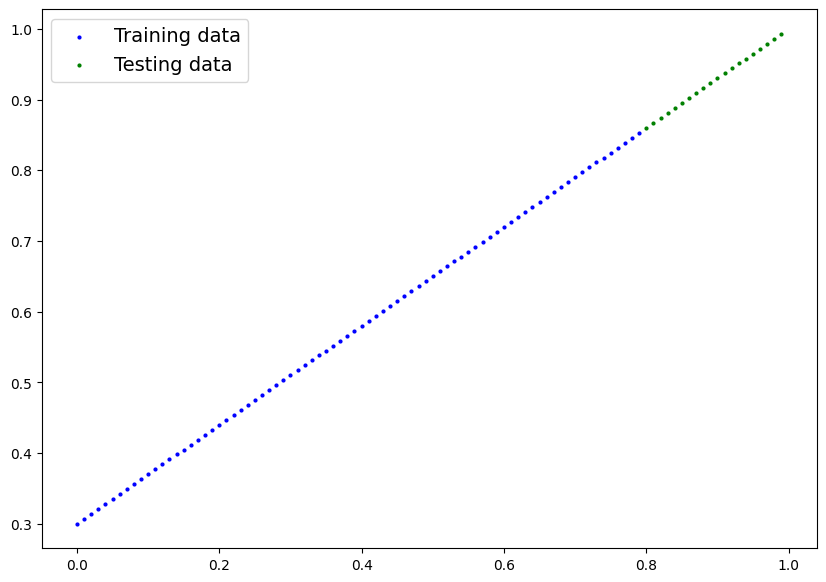

In [58]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [59]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1,
              out_features=10),
    nn.Linear(in_features=10,
              out_features=10),
    nn.Linear(in_features=10,
              out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [60]:
# loss and optimizer
loss_fn = nn.L1Loss() # MAE
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [61]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# move data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
  model_2.train()

  # forward pass
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Test
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  # print metrics
  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}')


Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


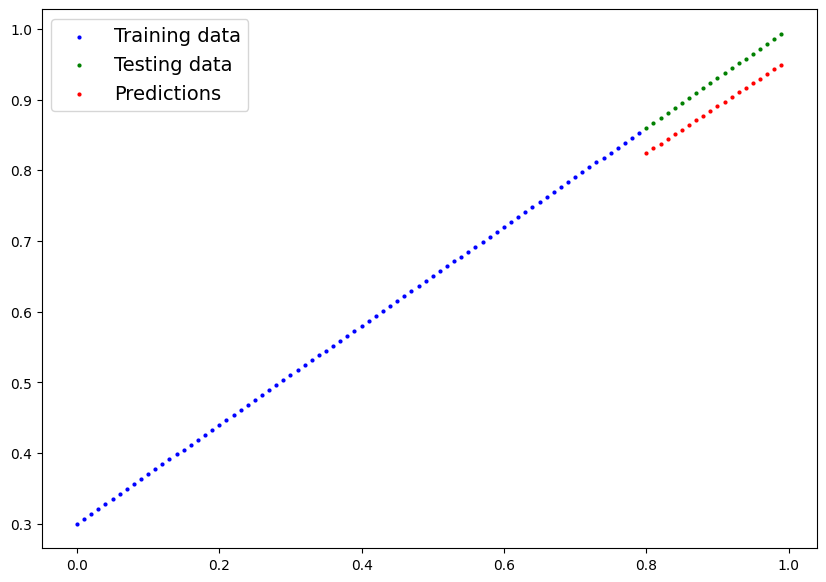

In [62]:
# Evaluate model
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. Non-linearity


### 6.1 Recreating non-linear data

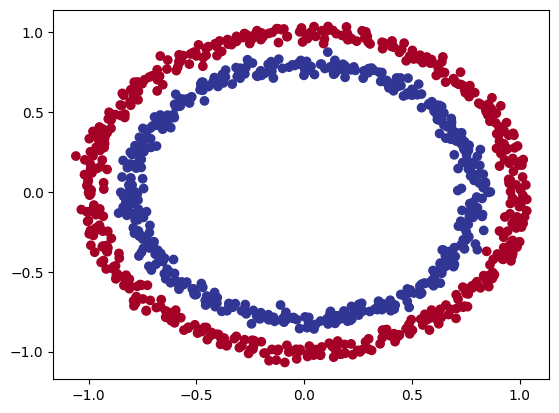

In [63]:
# Make and plot ata
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples= 1000

X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

plt.scatter(X[:, 0], X[:, 1],
            c=y, cmap=plt.cm.RdYlBu)

In [64]:
# convert data to tensors and then train and test split
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.3 Model with non-linearity

In [65]:
# a model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=10)
    self.layer_2 = nn.Linear(in_features=10,
                             out_features=10)
    self.layer_3 = nn.Linear(in_features=10,
                             out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [66]:
next(model_3.parameters()).device

device(type='cuda', index=0)

In [67]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)


### 6.3 Train the model

In [68]:
# random seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels

  loss = loss_fn(y_logits,
                 y_train) # BCEWithLogitsLoss takes logits as first input
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)


  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Test
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.4f} | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.4f}')

Epoch: 0 | Loss: 0.69295, Acc: 50.0000 | Test loss: 0.69319, Test Acc: 50.0000
Epoch: 100 | Loss: 0.69115, Acc: 52.8750 | Test loss: 0.69102, Test Acc: 52.5000
Epoch: 200 | Loss: 0.68977, Acc: 53.3750 | Test loss: 0.68940, Test Acc: 55.0000
Epoch: 300 | Loss: 0.68795, Acc: 53.0000 | Test loss: 0.68723, Test Acc: 56.0000
Epoch: 400 | Loss: 0.68517, Acc: 52.7500 | Test loss: 0.68411, Test Acc: 56.5000
Epoch: 500 | Loss: 0.68102, Acc: 52.7500 | Test loss: 0.67941, Test Acc: 56.5000
Epoch: 600 | Loss: 0.67515, Acc: 54.5000 | Test loss: 0.67285, Test Acc: 56.0000
Epoch: 700 | Loss: 0.66659, Acc: 58.3750 | Test loss: 0.66322, Test Acc: 59.0000
Epoch: 800 | Loss: 0.65160, Acc: 64.0000 | Test loss: 0.64757, Test Acc: 67.5000
Epoch: 900 | Loss: 0.62362, Acc: 74.0000 | Test loss: 0.62145, Test Acc: 79.0000


In [69]:
# evaluate
model_3.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_pred[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

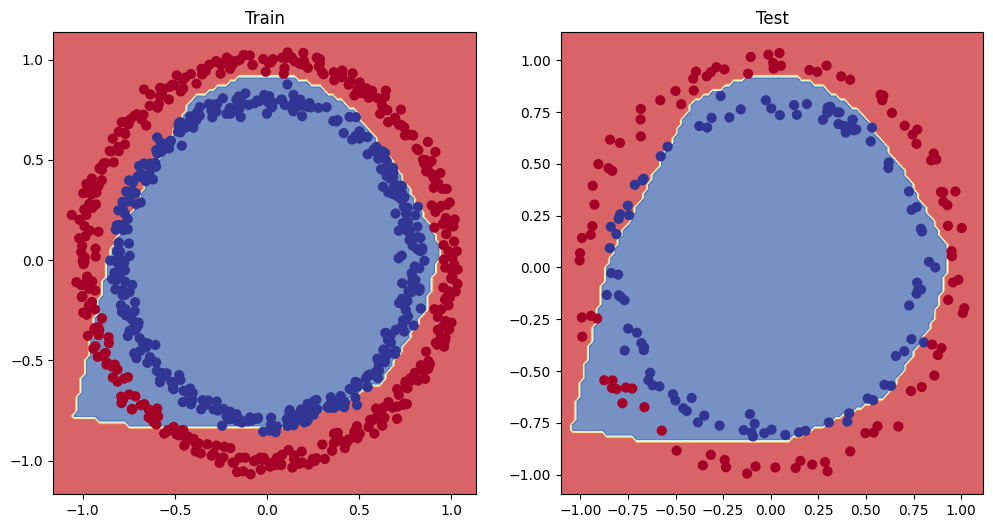

In [70]:
# plot decision boundaries
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### Improve the performance

In [71]:
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,
                             out_features=5)
    self.layer_2 = nn.Linear(in_features=5,
                             out_features=5)
    self.layer_3 = nn.Linear(in_features=5,
                             out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3_1 = CircleModelV3().to(device)
model_3_1


CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=5, bias=True)
  (layer_3): Linear(in_features=5, out_features=1, bias=True)
  (relu): ReLU()
)

In [72]:
next(model_3_1.parameters()).device

device(type='cuda', index=0)

In [73]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3_1.parameters(),
                            lr=0.01)

In [74]:
# torch.manual_seed(42)
# torch.cuda.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
  model_3_1.train()

  y_logits = model_3_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3_1.eval()
  with torch.inference_mode():
    test_logits = model_3_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.4f} | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.4f}')


Epoch: 0 | Loss: 0.72149, Acc: 50.0000 | Test loss: 0.72071, Test Acc: 50.0000
Epoch: 100 | Loss: 0.70177, Acc: 50.0000 | Test loss: 0.70194, Test Acc: 50.0000
Epoch: 200 | Loss: 0.69494, Acc: 50.0000 | Test loss: 0.69578, Test Acc: 50.0000
Epoch: 300 | Loss: 0.69258, Acc: 50.0000 | Test loss: 0.69385, Test Acc: 50.0000
Epoch: 400 | Loss: 0.69171, Acc: 50.0000 | Test loss: 0.69322, Test Acc: 44.5000
Epoch: 500 | Loss: 0.69132, Acc: 50.5000 | Test loss: 0.69295, Test Acc: 52.0000
Epoch: 600 | Loss: 0.69106, Acc: 52.1250 | Test loss: 0.69274, Test Acc: 50.0000
Epoch: 700 | Loss: 0.69085, Acc: 52.6250 | Test loss: 0.69254, Test Acc: 51.0000
Epoch: 800 | Loss: 0.69067, Acc: 52.7500 | Test loss: 0.69235, Test Acc: 51.5000
Epoch: 900 | Loss: 0.69049, Acc: 54.2500 | Test loss: 0.69216, Test Acc: 53.0000


## 7. Replicate non-linear activation functions

In [75]:
# create a tensor
A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [76]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

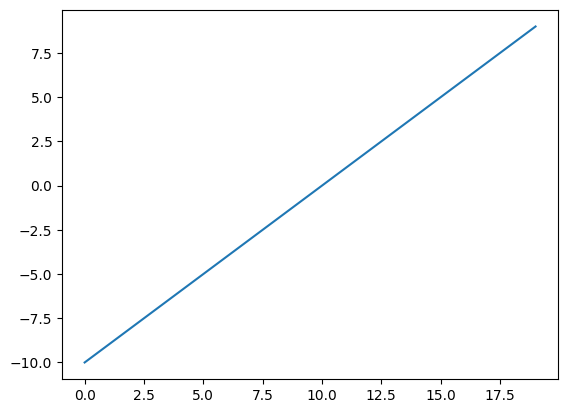

In [77]:
# Visualize the tensor
plt.plot(A);

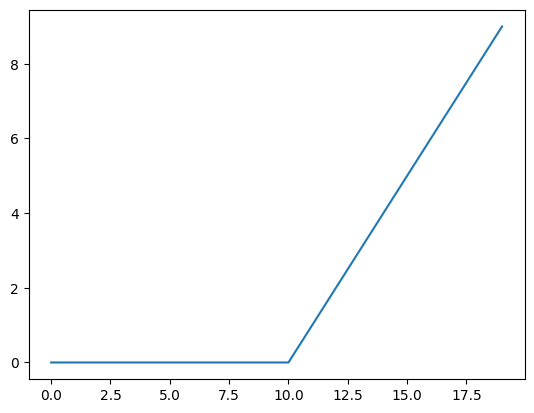

In [78]:
plt.plot(torch.relu(A))

In [79]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0), x)

In [80]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [81]:
def sigmoid(x: torch.Tensor) -> torch.Tensor:
  return 1 / (1 + torch.exp(-x))

In [82]:
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

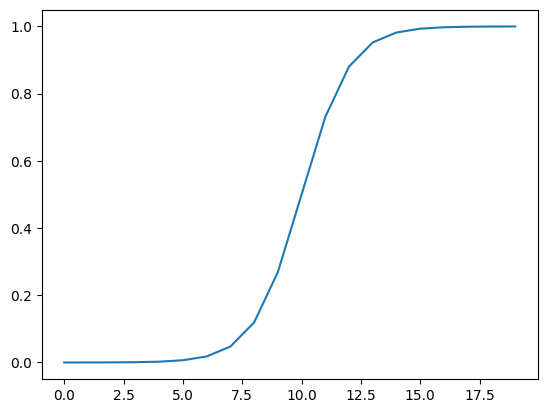

In [83]:
plt.plot(torch.sigmoid(A))

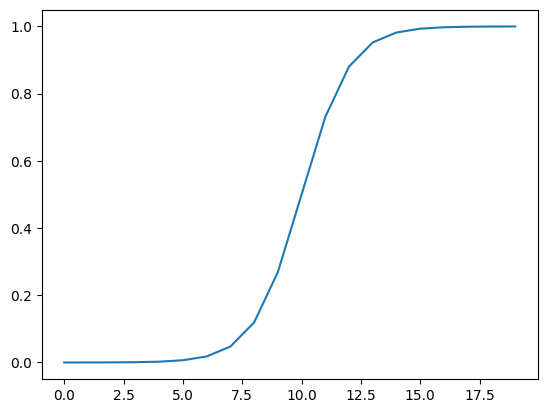

In [84]:
plt.plot(sigmoid(A))

## 8. Multi-class classification

### 8.1 Create a toy multi-class dataset

In [85]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

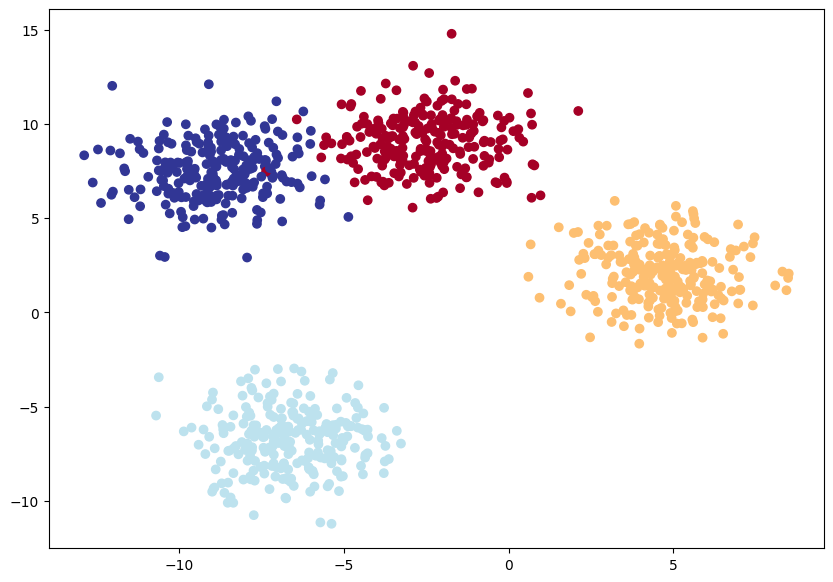

In [86]:
# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and set
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1],
            c=y_blob, cmap=plt.cm.RdYlBu)

### 8.2 Build multi-class classification model

In [87]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [88]:
# build model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    """
    Initialize multi-class classification model.

    Args:
    input_features (int): Number of input features to the model
    output_features (int): Number of output features of the model
    hidden_units (int): Number of hidden units between layers, default is 8

    Returns:

    Examples:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

In [89]:
model_4 = BlobModel(input_features=2,
                     output_features=4,
                     hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [90]:
next(model_4.parameters()).device

device(type='cuda', index=0)

### 8.3 Loss function and optimizer

To evaluate and train and test the model, we need to convert the model's outputs (logits) to prediction probabilities, and to prediction labels.



In [91]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [92]:
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[ 0.1269,  0.3256,  0.3673,  0.3341],
        [-0.4480, -0.1162, -0.2362,  0.1635],
        [-0.3328,  0.0821,  0.1826,  0.0641],
        [-0.1043,  0.2233,  0.2898,  0.2062],
        [ 0.1855,  0.1798, -0.0197,  0.4212],
        [-0.4525, -0.1351, -0.3307,  0.1892],
        [-0.2604,  0.0923,  0.1424,  0.1257],
        [-0.1530, -0.0151, -0.1925,  0.2944],
        [-0.3328,  0.0821,  0.1826,  0.0641],
        [-0.0194,  0.0776, -0.1572,  0.3489]], device='cuda:0')

In [93]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

### 8.4 Get prediction probabilities for a multi-class classfication model

In [94]:
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

In [95]:
# convert model's logit outputs to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 0.1269,  0.3256,  0.3673,  0.3341],
        [-0.4480, -0.1162, -0.2362,  0.1635],
        [-0.3328,  0.0821,  0.1826,  0.0641],
        [-0.1043,  0.2233,  0.2898,  0.2062],
        [ 0.1855,  0.1798, -0.0197,  0.4212]], device='cuda:0')
tensor([[0.2118, 0.2583, 0.2693, 0.2605],
        [0.1827, 0.2546, 0.2258, 0.3368],
        [0.1762, 0.2668, 0.2950, 0.2620],
        [0.1910, 0.2651, 0.2833, 0.2606],
        [0.2454, 0.2440, 0.1999, 0.3107]], device='cuda:0')


In [96]:
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0')

In [97]:
torch.max(y_pred_probs[0])

tensor(0.2693, device='cuda:0')

In [98]:
torch.argmax(y_pred_probs[0])

tensor(2, device='cuda:0')

In [99]:
# Convert model's prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2,
        2, 2, 3, 3, 2, 3, 3, 2, 2, 3, 1, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3,
        3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        2, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 2,
        2, 3, 3, 2, 2, 3, 3, 3, 2, 3, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 3, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 2, 2, 2, 1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3,
        2, 3, 2, 3, 3, 2, 2, 2], device='cuda:0')

### 8.5 Create a training and test loop

In [100]:
# Fit model to data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_probs = torch.softmax(y_logits, dim=1)
  y_pred = torch.argmax(y_probs, dim=1)

  loss = loss_fn(y_logits,
                 y_blob_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

    test_loss = loss_fn(test_logits,
                        y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                            y_pred=test_pred)

  if epoch % 10 == 0:
    print(f'Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.4f} | Test loss: {test_loss:.5f}, Test Acc: {test_acc:.4f}')


Epoch: 0 | Loss: 1.28966, Acc: 3.6250 | Test loss: 1.14037, Test Acc: 80.5000
Epoch: 10 | Loss: 0.72954, Acc: 27.3750 | Test loss: 0.68695, Test Acc: 95.5000
Epoch: 20 | Loss: 0.43934, Acc: 26.6250 | Test loss: 0.43475, Test Acc: 99.5000
Epoch: 30 | Loss: 0.33215, Acc: 26.6250 | Test loss: 0.33512, Test Acc: 99.5000
Epoch: 40 | Loss: 0.27722, Acc: 26.6250 | Test loss: 0.28027, Test Acc: 99.5000
Epoch: 50 | Loss: 0.24025, Acc: 26.7500 | Test loss: 0.24244, Test Acc: 99.5000
Epoch: 60 | Loss: 0.21235, Acc: 26.7500 | Test loss: 0.21350, Test Acc: 99.5000
Epoch: 70 | Loss: 0.19018, Acc: 26.7500 | Test loss: 0.19035, Test Acc: 99.5000
Epoch: 80 | Loss: 0.17208, Acc: 26.7500 | Test loss: 0.17139, Test Acc: 99.5000
Epoch: 90 | Loss: 0.15703, Acc: 26.7500 | Test loss: 0.15565, Test Acc: 99.5000


### 8.6 Evaluate model

In [101]:
# Evaluate
model_4.eval()
with torch.inference_mode():
  test_logits = model_4(X_blob_test)
  test_pred = torch.argmax(torch.softmax(test_logits, dim=1), dim=1)

test_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [102]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

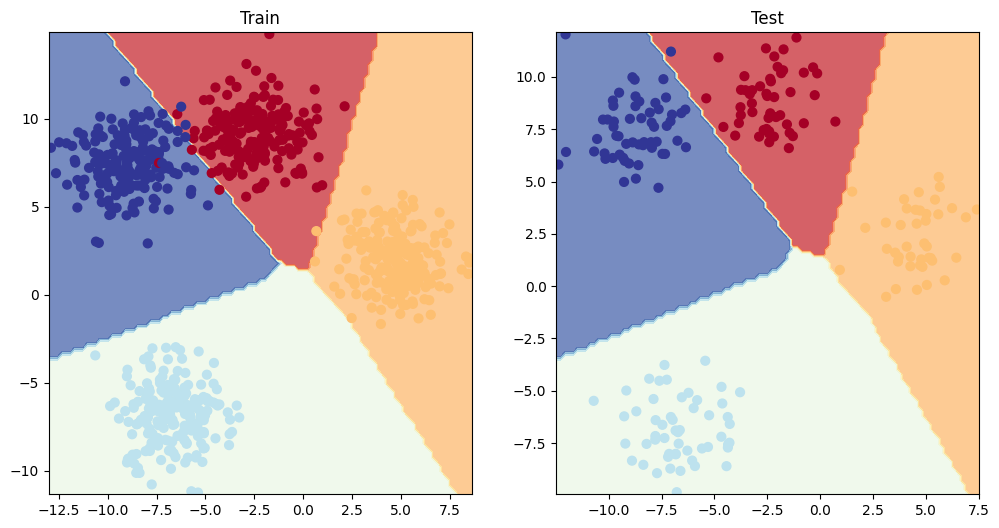

In [103]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)

## 9 A few more classification metrics

* Accuracy - out of 100 samples, how many model gets right
* Precision
* Recall
* F1-score
* Confusion matrix
* Classfication report


In [104]:
!pip install torchmetrics

In [105]:
from torchmetrics import Accuracy

In [108]:
torchmetrics_accuracy = Accuracy(task='multiclass',
                                 num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_blob_test, test_pred)

tensor(0.9950, device='cuda:0')

In [110]:
sklearn_accuracy = sklearn.metrics.accuracy_score(y_blob_test.cpu(), test_pred.cpu())
sklearn_accuracy

0.995